## Gathering Data form External CSV File 

In [159]:
#import libraries and load dataset

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

df=pd.read_csv('./tmdb-movies.csv')

    

# Define Question
> #### is there any colleration between budget and revenue?
> #### what is Top 10 category revenue based on genres ?
> #### ### what is  The Top 10 Movies revenue from Ten Years Ago
> #### compare the result from last question to last year now ?
> #### compare budget and revenue over last ten years ?
> #### based on vote_count is sastified of people is there any corr between vote_count and budget_ads
> #### is there any corr between budget_adj and revenue_adj? and how mach the diff ?



In [160]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#  data Wrangling >  data Gathering >  data Assessting > data cleaning 




In [161]:
#deleted columns that's we don't need it 
df.drop(['cast','overview','tagline'],axis=1,inplace=True)

In [162]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,homepage,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,http://www.madmaxmovie.com/,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,http://www.furious7.com/,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [163]:
#counts rows and columns 
df.shape

(10866, 18)

In [164]:
#info for check datatype incorrect and misssing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   homepage              2936 non-null   object 
 7   director              10822 non-null  object 
 8   keywords              9373 non-null   object 
 9   runtime               10866 non-null  int64  
 10  genres                10843 non-null  object 
 11  production_companies  9836 non-null   object 
 12  release_date          10866 non-null  object 
 13  vote_count            10866 non-null  int64  
 14  vote_average          10866 non-null  float64
 15  release_year       

### data cleaning

> * there is missing data in ['homepage','tagline','keywords','production_companies','genres','director','imdb_id']
 
> * we have to optimize the dataset its 1.6+ MB like ['runtime','vote_count','vote_average']
 
> * to more optimize dataset we have to change datatype of some column to category datatype like ['geners','production_companies']
 
> * we have to change incorrect datatype like ['release_date']

In [165]:
df.homepage.unique()

array(['http://www.jurassicworld.com/', 'http://www.madmaxmovie.com/',
       'http://www.thedivergentseries.movie/#insurgent', ...,
       'http://www.animalhouse.com/',
       'http://www.mgm.com/#/our-titles/1092/The-Last-Waltz/',
       'http://en.wikipedia.org/wiki/Hooper_(film)'], dtype=object)

In [166]:
#first remove duplecates rows 
df.duplicated().sum()

1

In [167]:
#remove duplicated data
df.drop_duplicates(inplace=True)

In [168]:
#recheck if we removed duplecates rows 
df.duplicated().sum()

0

In [169]:
#dealing with missing data  
df.dropna(how='any',axis=0,inplace=True)

In [170]:
#change datatype for incorrct datatype columns and optimize dataset to reduce the size of dataset
df['genres']= df['genres'].astype('category')
df['production_companies']= df['production_companies'].astype('category')
df['release_date'] = pd.to_datetime(df['release_date'])


C:\Users\abda1\AppData\Local\Temp/ipykernel_11356/4221999696.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'])


In [171]:
#optimize more column from int64 and float64
df['runtime']= df['runtime'].astype('int8')
df['vote_count']= df['vote_count'].astype('int32')
df['vote_average']= df['vote_average'].astype('float32')


df.info()

## Exploratory Data Analysis (EDA)


In [172]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,homepage,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,http://www.madmaxmovie.com/,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,android|spaceship|jedi|space opera|3d,-120,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,http://www.furious7.com/,James Wan,car race|speed|revenge|suspense|car,-119,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


> ## is there any correlation between budget and revenue?

In [173]:
#calculate Correltion between budget and revenue 
correlation_matrix=df['budget'].corr(df['revenue'])
correlation_matrix

0.7556517416104733

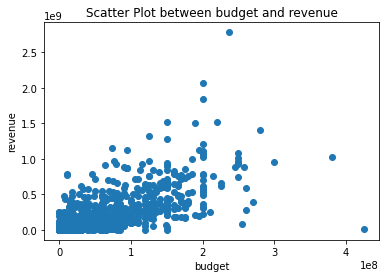

In [174]:
#visualize the relationship between budget and revenue 
plt.scatter(df['budget'],df['revenue'])
plt.xlabel('budget')
plt.ylabel('revenue')
plt.title('Scatter Plot between budget and revenue')
plt.show()

In [175]:
#statistical signigicance 
from scipy.stats import pearsonr

correlation_coefficient,p_value=pearsonr(df['budget'],df['revenue'])
correlation_coefficient,p_value

(0.7556517416104743, 0.0)

### answer Q1 : is there any correlation between budget and revenue?
>> #### there is no correlation between budget and revenue

> ## what is biggest 10 category revenue based on genres ?

In [176]:
df_sorted_revenue=df.groupby('genres')['revenue'].nlargest(10).reset_index()
df_sorted_revenue_d=pd.DataFrame(df_sorted_revenue)
df_sorted_revenue_d


C:\Users\abda1\AppData\Local\Temp/ipykernel_11356/2592631456.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sorted_revenue=df.groupby('genres')['revenue'].nlargest(10).reset_index()


,genres,level_1,revenue
0,Action,25,682330139
1,Action,1938,310669540
2,Action,6260,162944923
3,Action,1975,136000000
4,Action,1456,87784194
...,...,...,...
1660,War|Drama|History|Action,715,154984035
1661,War|Drama|History|Thriller,1563,0
1662,Western,7443,70016220
1663,Western|Animation|Family|Comedy|Music,7046,103951461


In [177]:
#now sum the value group by genres to find the highest revenue and use idxmax 
total_revenue_by_genre=df_sorted_revenue_d.groupby('genres')['revenue'].sum()
total_revenue_by_genre

C:\Users\abda1\AppData\Local\Temp/ipykernel_11356/3298741858.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_revenue_by_genre=df_sorted_revenue_d.groupby('genres')['revenue'].sum()


genres
Action                                               1567297806
Action|Adventure                                        7500000
Action|Adventure|Animation                                    0
Action|Adventure|Animation|Family                             0
Action|Adventure|Animation|Family|Science Fiction     631442092
                                                        ...    
War|Drama|History|Action                              154984035
War|Drama|History|Thriller                                    0
Western                                                70016220
Western|Animation|Family|Comedy|Music                 103951461
Western|Drama|Adventure|Thriller                      532950503
Name: revenue, Length: 774, dtype: int64

In [178]:
#new dataframe to plot the date from series total_revenue_by_genres

plt_total_revenue_by_genre=pd.DataFrame(total_revenue_by_genre).reset_index()
plt_total_revenue_by_genre.columns=['Genres','Total_Revenue']
plt_genres_revenue=plt_total_revenue_by_genre.sort_values(by='Total_Revenue',ascending=False).head(10)
plt_genres_revenue


,Genres,Total_Revenue
192,Adventure|Fantasy|Action,7380147493
143,Adventure|Action|Science Fiction,4839902747
33,Action|Adventure|Science Fiction,4657777088
29,Action|Adventure|Fantasy|Science Fiction,4474490465
244,Animation|Family,3981404005
204,Adventure|Fantasy|Family,3801753979
145,Adventure|Action|Thriller,3612469413
659,Science Fiction|Action|Adventure,3245494492
107,Action|Science Fiction|Adventure,3234256634
382,Drama,2993328535


Genres                                    Total_Revenue
Action|Adventure|Fantasy|Science Fiction  4474490465       1
Action|Adventure|Science Fiction          4657777088       1
Action|Science Fiction|Adventure          3234256634       1
Adventure|Action|Science Fiction          4839902747       1
Adventure|Action|Thriller                 3612469413       1
Adventure|Fantasy|Action                  7380147493       1
Adventure|Fantasy|Family                  3801753979       1
Animation|Family                          3981404005       1
Drama                                     2993328535       1
Science Fiction|Action|Adventure          3245494492       1
Name: count, dtype: int64


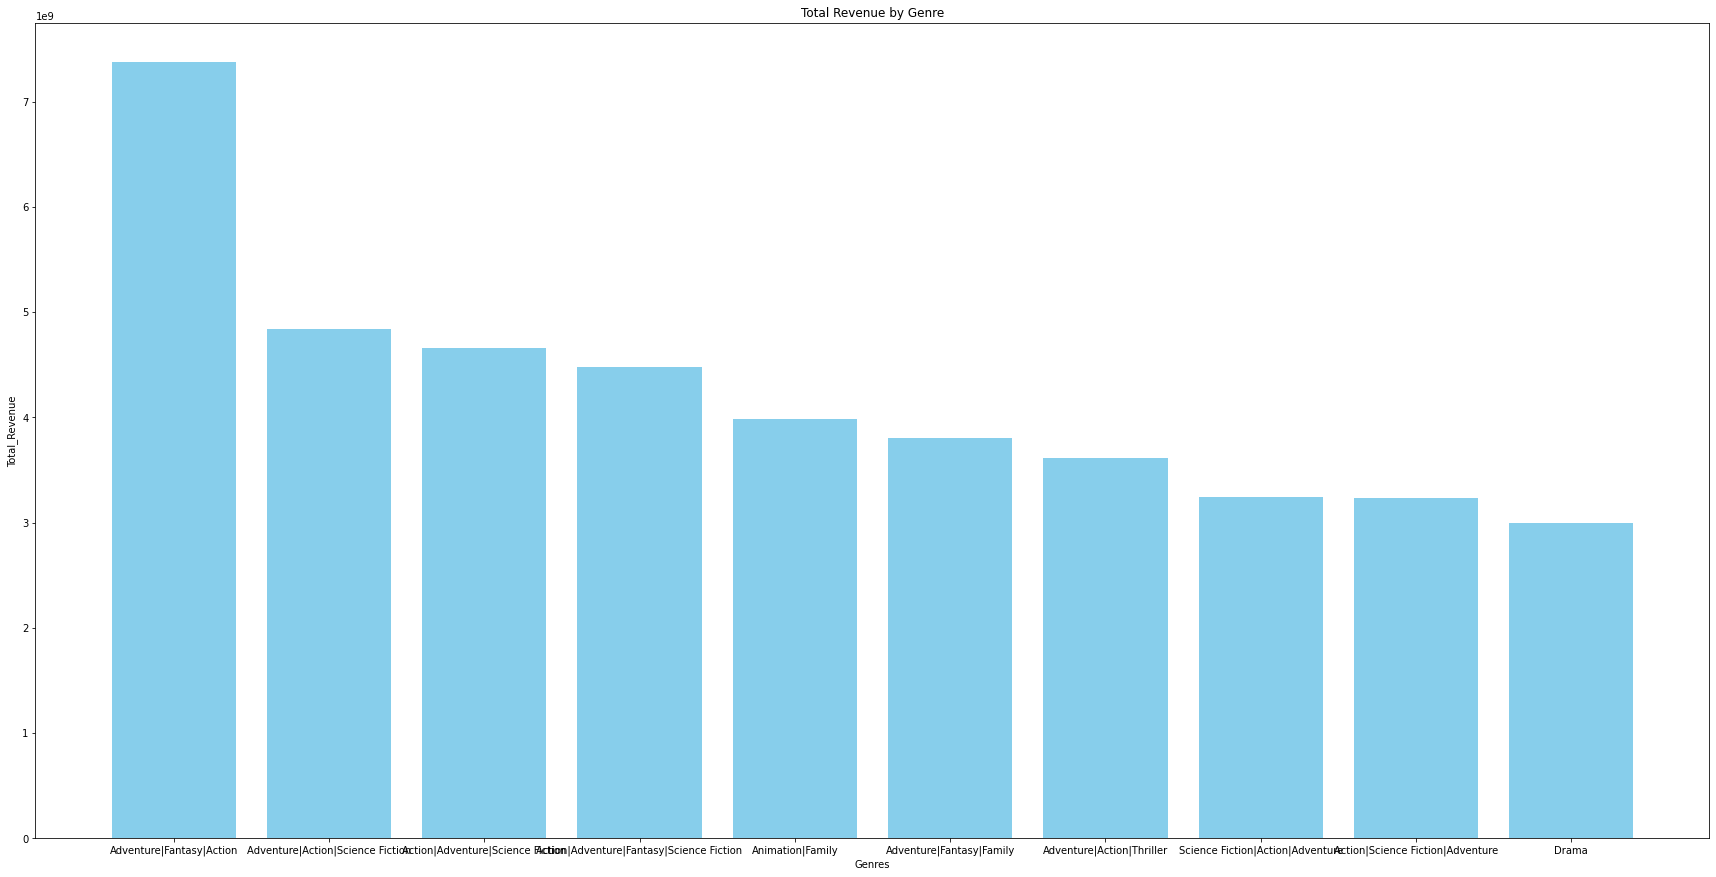

In [179]:
print(plt_genres_revenue.value_counts())
plt.figure(figsize=(30, 15))
plt.bar(plt_genres_revenue['Genres'], plt_genres_revenue['Total_Revenue'], color='skyblue')
plt.title('Total Revenue by Genre')
plt.xlabel('Genres')
plt.ylabel('Total_Revenue')
plt.show()

 ## what is biggest 10 category revenue based on genres ?
> #### Action                                              
> #### Action|Adventure                                      
> #### Action|Adventure|Animation                                    
> #### Action|Adventure|Animation|Family                             
> #### Action|Adventure|Animation|Family|Science Fiction     
> #### War|Drama|History|Action                           
> #### War|Drama|History|Thriller                                    
> #### Western                                               
> #### Western|Animation|Family|Comedy|Music                 
> #### Western|Drama|Adventure|Thriller   
 

In [180]:
plt_genres_revenue.head(1)

,Genres,Total_Revenue
192,Adventure|Fantasy|Action,7380147493


## the highest one between the Ten highest genres revenue is :
> ## Adventure|Fantasy|Action

### what is  The Top 10 Movies revenue from Ten Years Ago

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2413 entries, 0 to 10819
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    2413 non-null   int64         
 1   imdb_id               2413 non-null   object        
 2   popularity            2413 non-null   float64       
 3   budget                2413 non-null   int64         
 4   revenue               2413 non-null   int64         
 5   original_title        2413 non-null   object        
 6   homepage              2413 non-null   object        
 7   director              2413 non-null   object        
 8   keywords              2413 non-null   object        
 9   runtime               2413 non-null   int8          
 10  genres                2413 non-null   category      
 11  production_companies  2413 non-null   category      
 12  release_date          2413 non-null   datetime64[ns]
 13  vote_count            

In [182]:
#target year in df.year columns befor ten years from now 
current_year=2015
target_year=current_year-10
df_ten_years_movies=df[df['release_year']==target_year]
#make dataframe for id ,imdb_id,original_title and revenue
selected_columns_of_ten_movies=df_ten_years_movies[['id','imdb_id','release_year','original_title','revenue']]
df_ten_years_movies_result=selected_columns_of_ten_movies.sort_values(by='revenue',ascending=False).head(10) # sort_values => to get revenue from highest value
df_ten_years_movies_result

,id,imdb_id,release_year,original_title,revenue
6190,674,tt0330373,2005,Harry Potter and the Goblet of Fire,895921036
6196,1895,tt0121766,2005,Star Wars: Episode III - Revenge of the Sith,850000000
6191,272,tt0372784,2005,Batman Begins,374218673
6208,9982,tt0371606,2005,Chicken Little,314432665
6201,561,tt0360486,2005,Constantine,230427240
6213,1495,tt0320661,2005,Kingdom of Heaven,211643158
6280,7552,tt0369441,2005,Fun with Dick and Jane,202026112
6232,533,tt0312004,2005,The Curse of the Were-Rabbit,192452832
6219,142,tt0388795,2005,Brokeback Mountain,178043761
6198,1635,tt0399201,2005,The Island,162949164


## Frozen Movie was the highest revenue in 2013

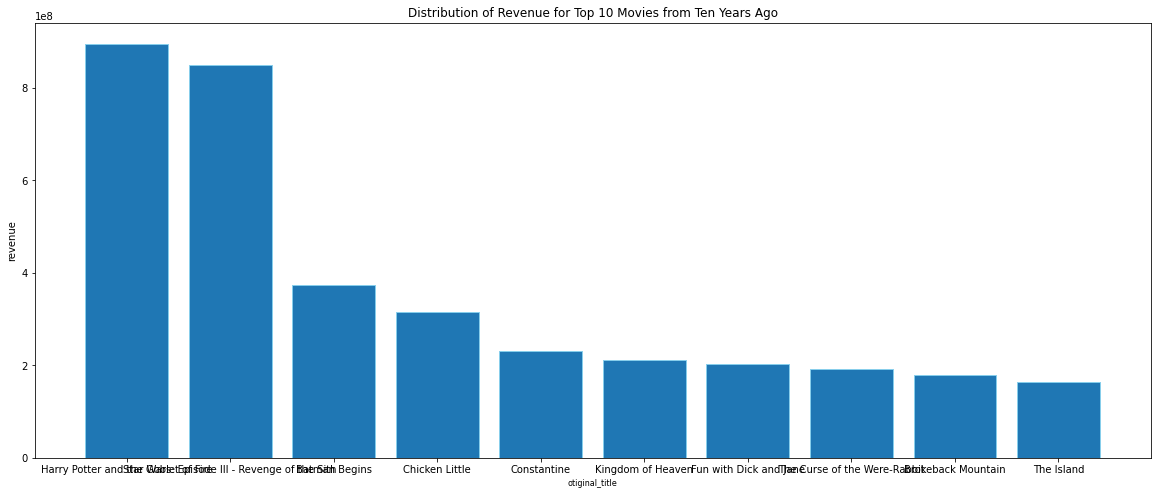

In [183]:

plt.figure(figsize=(20, 8));
plt.bar(df_ten_years_movies_result['original_title'],df_ten_years_movies_result['revenue'], edgecolor='skyblue');
plt.title('Distribution of Revenue for Top 10 Movies from Ten Years Ago');
plt.xlabel('otiginal_title',fontsize=8);
plt.ylabel('revenue');
plt.show();


## compare the result from last question to last year  ?


In [194]:
#we will repeat the last Question and do it for last year 2015 in datasets
df_movies_2015=df[df['release_year']==2015]
selected_columns_of_ten_movies_last_year=df_movies_2015[['id','imdb_id','release_year','original_title','revenue']]
df_ten_years_movies_result_2015=selected_columns_of_ten_movies_last_year.sort_values(by='revenue',ascending=False).head(10)
df_ten_years_movies_result_2015


,id,imdb_id,release_year,original_title,revenue
3,140607,tt2488496,2015,Star Wars: The Force Awakens,2068178225
0,135397,tt0369610,2015,Jurassic World,1513528810
4,168259,tt2820852,2015,Furious 7,1506249360
14,99861,tt2395427,2015,Avengers: Age of Ultron,1405035767
8,211672,tt2293640,2015,Minions,1156730962
10,206647,tt2379713,2015,Spectre,880674609
9,150540,tt2096673,2015,Inside Out,853708609
25,177677,tt2381249,2015,Mission: Impossible - Rogue Nation,682330139
19,131634,tt1951266,2015,The Hunger Games: Mockingjay - Part 2,650523427
7,286217,tt3659388,2015,The Martian,595380321


In [196]:
#we need to concat the two dataframe

merged_df=pd.concat([df_ten_years_movies_result,df_ten_years_movies_result_2015])
merged_df

,id,imdb_id,release_year,original_title,revenue
6190,674,tt0330373,2005,Harry Potter and the Goblet of Fire,895921036
6196,1895,tt0121766,2005,Star Wars: Episode III - Revenge of the Sith,850000000
6191,272,tt0372784,2005,Batman Begins,374218673
6208,9982,tt0371606,2005,Chicken Little,314432665
6201,561,tt0360486,2005,Constantine,230427240
6213,1495,tt0320661,2005,Kingdom of Heaven,211643158
6280,7552,tt0369441,2005,Fun with Dick and Jane,202026112
6232,533,tt0312004,2005,The Curse of the Were-Rabbit,192452832
6219,142,tt0388795,2005,Brokeback Mountain,178043761
6198,1635,tt0399201,2005,The Island,162949164


ConversionError: Failed to convert value(s) to axis units: 6190             Harry Potter and the Goblet of Fire
6196    Star Wars: Episode III - Revenge of the Sith
6191                                   Batman Begins
6208                                  Chicken Little
6201                                     Constantine
6213                               Kingdom of Heaven
6280                          Fun with Dick and Jane
6232                    The Curse of the Were-Rabbit
6219                              Brokeback Mountain
6198                                      The Island
3                       Star Wars: The Force Awakens
0                                     Jurassic World
4                                          Furious 7
14                           Avengers: Age of Ultron
8                                            Minions
10                                           Spectre
9                                         Inside Out
25                Mission: Impossible - Rogue Nation
19             The Hunger Games: Mockingjay - Part 2
7                                        The Martian
Name: original_title, dtype: object

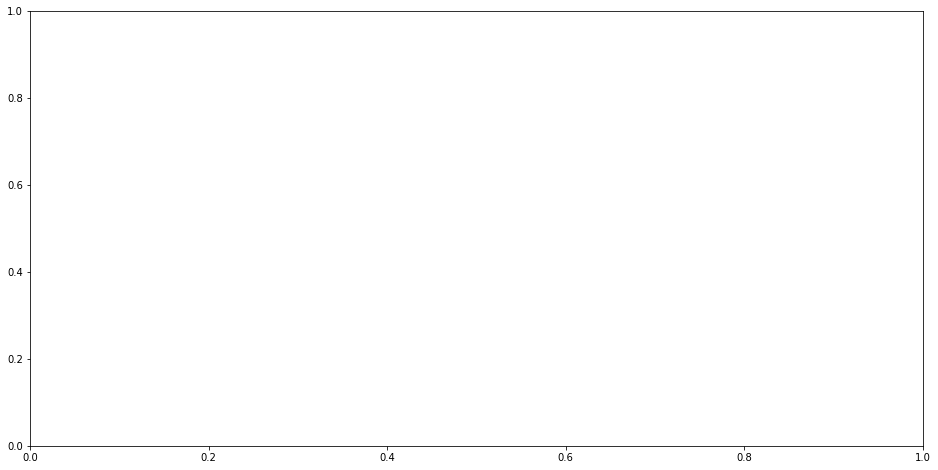

In [197]:
# now we will compare the 20
plt.figure(figsize=(16, 8));
plt.hist(merged_df.groupby('release_year')['revenue'].sum(),merged_df['original_title'],edgecolor='skyblue');
plt.title('Distribution of Revenue for Top 10 Movies for 2005 and 2015');
plt.xlabel('otiginal_title',fontsize=8);
plt.ylabel('revenue');
plt.show();
